🚀 STARTING PHASE 3: DATA TRANSFORMATION
Loaded cleaned data: (768, 9)
🎯 CREATING AGE GROUPS
Age Group Distribution:
  - 20-29: 396 cases (51.6%)
  - 30-39: 165 cases (21.5%)
  - 40-49: 118 cases (15.4%)
  - 50-59: 57 cases (7.4%)
  - 60+: 32 cases (4.2%)

🏋️ CREATING BMI CATEGORIES
BMI Category Distribution:
  - Obese I: 232 cases (30.2%)
  - Overweight: 180 cases (23.4%)
  - Obese II: 148 cases (19.3%)
  - Normal: 108 cases (14.1%)
  - Obese III: 96 cases (12.5%)
  - Underweight: 4 cases (0.5%)

🩸 CREATING GLUCOSE CATEGORIES
Glucose Category Distribution:
  - Diabetic: 297 cases (38.7%)
  - Prediabetic: 279 cases (36.3%)
  - Normal: 192 cases (25.0%)
  - Severe: 0 cases (0.0%)

💓 CREATING BLOOD PRESSURE CATEGORIES
Blood Pressure Category Distribution:
  - Normal: 480 cases (62.5%)
  - Elevated: 127 cases (16.5%)
  - Low: 123 cases (16.0%)
  - High: 37 cases (4.8%)

🔤 ENCODING CATEGORICAL FEATURES
  - BMI_Category: Label encoded
  - Glucose_Category: Label encoded
  - BP_Category: Labe

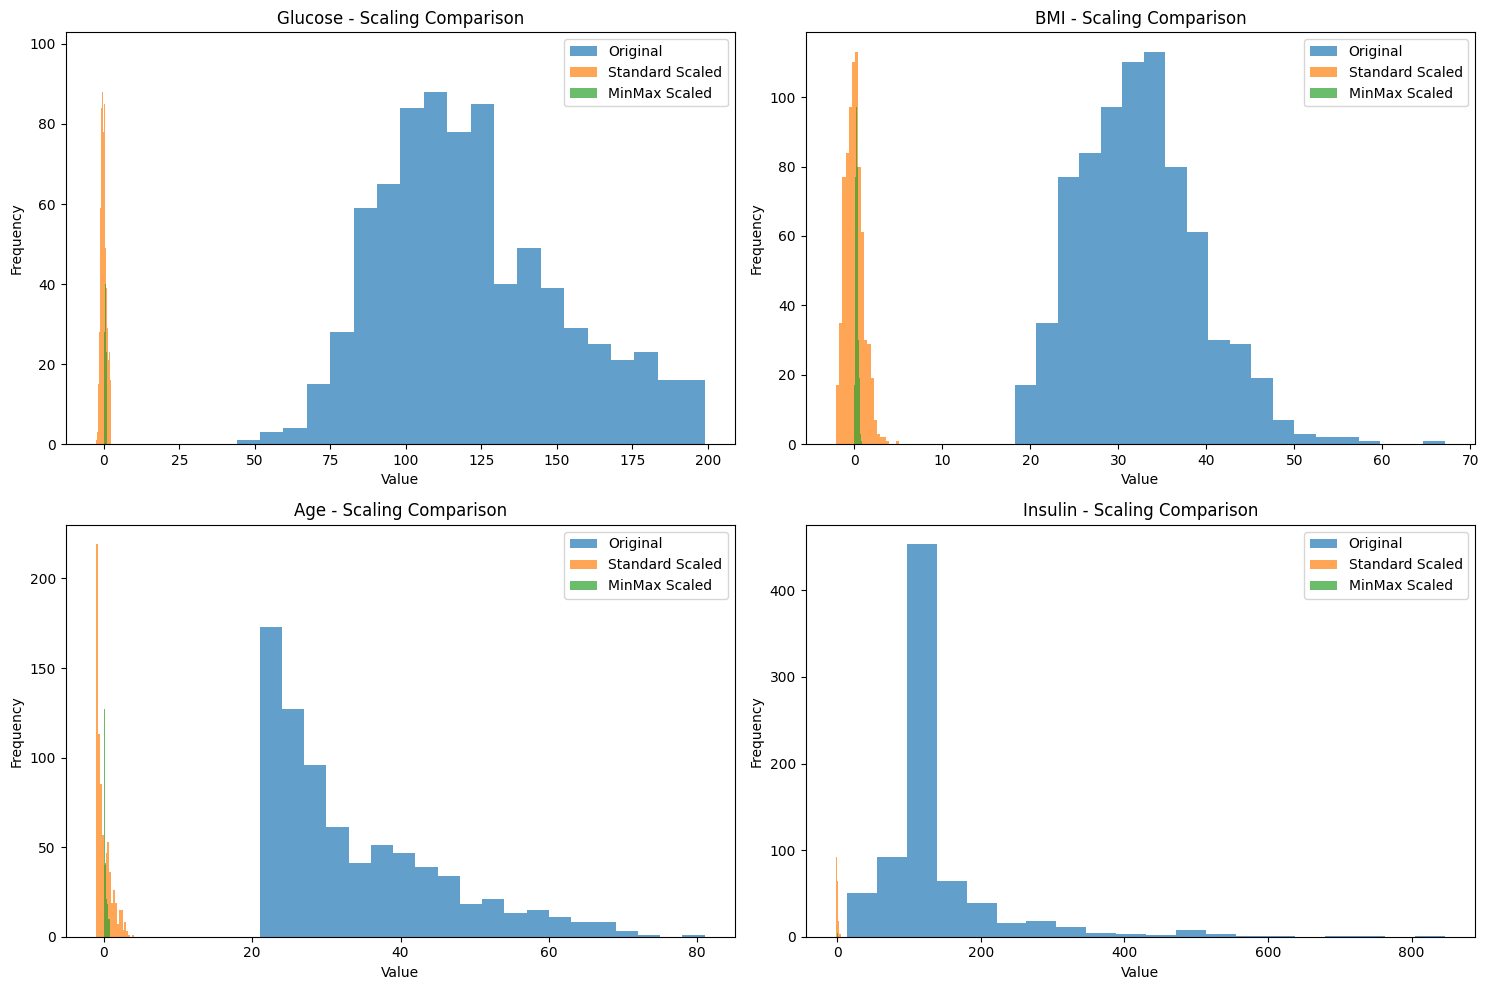


Scaling Method Comparison:
StandardScaler - Mean ~0, Std ~1
MinMaxScaler - Range [0, 1]

⚖️ SCALING NUMERICAL FEATURES USING STANDARD SCALING
Scaling Applied to:
  - Pregnancies
  - Glucose
  - BloodPressure
  - SkinThickness
  - Insulin
  - BMI
  - DiabetesPedigreeFunction
  - Age

Scaler parameters saved for inference

🔗 CREATING INTERACTION FEATURES
Interaction Features Created:
  - BMI_Age_Interaction: Metabolic health indicator
  - Glucose_Insulin_Interaction: Insulin resistance proxy
  - Metabolic_Score: Combined metabolic health score

📋 DATA TRANSFORMATION SUMMARY REPORT
🚀 TRANSFORMATION OPERATIONS PERFORMED:
• Created clinically meaningful age groups
• Created WHO-standard BMI categories
• Created clinical glucose categories
• Applied standard scaling to numerical features

📊 TRANSFORMED DATA STATUS:
• Total features: 32
• Dataset shape: (768, 32)
• Numerical features: 23
• Categorical features: 12

💡 RECOMMENDATIONS FOR PHASE 4:
• Proceed with feature selection and dimension

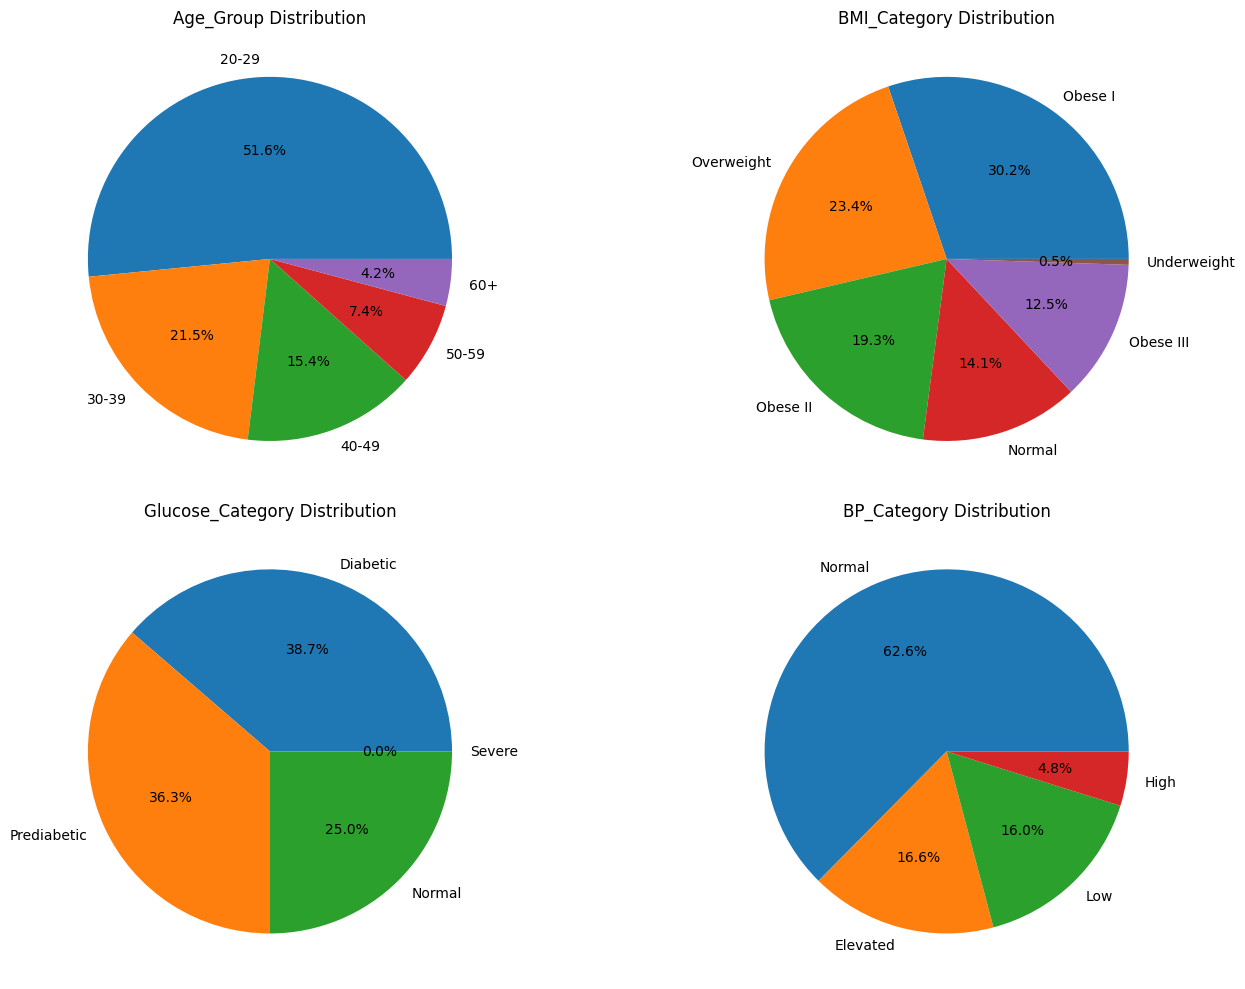


🎯 TRANSFORMATION COMPLETE!
Original features: 9
Transformed features: 32
New features added: 23


In [1]:
# Phase 3: Data Transformation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append('../src')

from data_transformation import execute_data_transformation_pipeline

print("🚀 STARTING PHASE 3: DATA TRANSFORMATION")
print("=" * 50)

# Load the cleaned data from Phase 2
df_cleaned = pd.read_csv('../data/processed/diabetes_cleaned.csv')
print(f"Loaded cleaned data: {df_cleaned.shape}")

# Execute transformation pipeline
df_transformed, transformation_report = execute_data_transformation_pipeline(df_cleaned)

# Save transformed data
df_transformed.to_csv('../data/processed/diabetes_transformed.csv', index=False)
print("\n💾 Transformed data saved to: ../data/processed/diabetes_transformed.csv")

# Display feature overview
print("\n🆕 NEW FEATURES CREATED:")
print("=" * 40)
new_features = [col for col in df_transformed.columns if col not in df_cleaned.columns]
for feature in new_features:
    print(f"  - {feature}")

# Visualize new categorical features
categorical_features = [col for col in df_transformed.columns if 'Category' in col or 'Group' in col]

if categorical_features:
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    axes = axes.ravel()
    
    for i, feature in enumerate(categorical_features[:4]):
        value_counts = df_transformed[feature].value_counts()
        axes[i].pie(value_counts.values, labels=value_counts.index, autopct='%1.1f%%')
        axes[i].set_title(f'{feature} Distribution')
    
    plt.tight_layout()
    plt.show()

print(f"\n🎯 TRANSFORMATION COMPLETE!")
print(f"Original features: {len(df_cleaned.columns)}")
print(f"Transformed features: {len(df_transformed.columns)}")
print(f"New features added: {len(new_features)}")